In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"#

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [4]:
import tensorflow as tf

In [5]:
# 1. Basic RNNs

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()


In [6]:
import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})


In [7]:
print(Y0_val)


[[ 0.83526677  0.3870193   0.9748591   0.9391389  -0.246065  ]
 [-0.9968126   0.99999964  0.99998003  0.9994862  -0.9987596 ]
 [-0.9999995   1.          1.          0.9999958  -0.99999875]
 [-1.          1.         -0.9979069   0.9959689  -1.        ]]


In [8]:
print(Y1_val)

[[-1.          1.          0.999994    0.9999801  -0.99999905]
 [ 0.99633026  0.85228527  0.01146385  0.1596434   0.9979304 ]
 [-0.99999803  1.          0.9999051   0.9969146  -0.99665266]
 [-0.9999991   1.          0.998554   -0.71436626 -0.9461056 ]]


In [10]:
# Static Unrolling through time
n_inputs = 3
n_neurons = 5

tf.reset_default_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, [X0, X1],
                                                dtype=tf.float32)
Y0, Y1 = output_seqs

In [11]:
init = tf.global_variables_initializer()

In [12]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})


In [13]:
Y0_val

array([[ 5.7921147e-01, -8.1583202e-01, -5.4019678e-04, -5.0539726e-01,
         3.9314246e-01],
       [ 8.8832414e-01, -9.9670869e-01,  4.6306485e-01,  6.7290413e-01,
         6.1953568e-01],
       [ 9.7408760e-01, -9.9994636e-01,  7.6283103e-01,  9.7519022e-01,
         7.7510512e-01],
       [ 5.4666293e-01,  9.4302946e-01, -3.1380245e-01,  9.9986190e-01,
        -9.9718642e-01]], dtype=float32)

In [14]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "b<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [15]:
show_graph(tf.get_default_graph())

In [16]:
n_steps = 2
n_inputs = 3
n_neurons = 5


In [17]:
tf.reset_default_graph()

In [18]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1, 0, 2]))

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

# X_seqs is a list of length n_steps, with each element of a tensor [None, n_inputs] 
# and the size is of the mini-batch size, so same function call as before
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs,
                                                dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])


In [19]:
init = tf.global_variables_initializer()


In [20]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})


In [21]:
print(outputs_val)

[[[ 0.9506973   0.5233771   0.22083232  0.75234604  0.9320109 ]
  [ 1.         -0.9755912  -0.99459994  1.          1.        ]]

 [[ 0.9999548  -0.02832131 -0.34306186  0.99962574  0.99997723]
  [ 0.21239875  0.35077652 -0.83894795 -0.20121779  0.6239682 ]]

 [[ 0.99999994 -0.5632888  -0.73506063  0.9999997   1.        ]
  [ 0.9999416  -0.8523749  -0.9908205   0.99994886  0.9999987 ]]

 [[ 0.5125035  -0.9999667  -0.7071652   0.99048775  0.99830693]
  [ 0.9395226  -0.59405476 -0.93545717  0.973211    0.9930363 ]]]


In [22]:
print(np.transpose(outputs_val, axes=[1, 0, 2])[1])

[[ 1.         -0.9755912  -0.99459994  1.          1.        ]
 [ 0.21239875  0.35077652 -0.83894795 -0.20121779  0.6239682 ]
 [ 0.9999416  -0.8523749  -0.9908205   0.99994886  0.9999987 ]
 [ 0.9395226  -0.59405476 -0.93545717  0.973211    0.9930363 ]]


In [23]:
# But this methods still costs memory, and may lead to OOM exception

In [24]:
# Dynamic Unrolling through time
n_steps = 2
n_inputs = 3
n_neurons = 5

tf.reset_default_graph()


In [25]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [26]:
init = tf.global_variables_initializer()

In [27]:
X_batch = np.array([
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X: X_batch})


In [28]:
print(outputs_val)

[[[ 0.8462441   0.6066318  -0.75599355 -0.8875199   0.8129575 ]
  [ 0.9999997   0.99999446  0.5230507  -1.          0.9999953 ]]

 [[ 0.99934703  0.99509776 -0.87053925 -0.99989694  0.9991186 ]
  [ 0.6578055   0.13955267  0.743633   -0.2856451  -0.55606586]]

 [[ 0.99999756  0.9999506  -0.9333538  -0.9999998   0.99999624]
  [ 0.9999282   0.9993941   0.852145   -0.9999867   0.9987676 ]]

 [[ 0.9447746   0.9991163   0.99996215 -0.9990587   0.9995323 ]
  [ 0.8854002   0.87292016  0.85070634 -0.936653    0.70193934]]]


In [29]:
show_graph(tf.get_default_graph())

In [30]:
# What if the input sequence has variable length?
# you must specify the length when calling the dynamic_rnn or static_rnn functions
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)


In [31]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32,
                                    sequence_length=seq_length)

In [32]:
init = tf.global_variables_initializer()

In [33]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])
seq_length_batch = np.array([2, 1, 2, 2]) # Must be a 1-d tensor

In [34]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run(
        [outputs, states], feed_dict={X: X_batch, seq_length: seq_length_batch})


In [35]:
print(outputs_val)

[[[ 0.4754483  -0.13168356 -0.572991   -0.6720379  -0.42602208]
  [ 0.95215696  0.98389643  0.6072102  -0.9620299   0.9996597 ]]

 [[ 0.8472571   0.37434804 -0.3608841  -0.91140896  0.57531494]
  [ 0.          0.          0.          0.          0.        ]]

 [[ 0.96226346  0.72561044 -0.10346794 -0.9783332   0.9431571 ]
  [ 0.12061961  0.9286147  -0.23777656 -0.27806568  0.97927016]]

 [[-0.07092319  0.9988277   0.996343    0.999653    0.9999778 ]
  [-0.4760999  -0.50878274  0.95791274  0.88778406  0.369149  ]]]


In [36]:
print(states_val)

[[ 0.95215696  0.98389643  0.6072102  -0.9620299   0.9996597 ]
 [ 0.8472571   0.37434804 -0.3608841  -0.91140896  0.57531494]
 [ 0.12061961  0.9286147  -0.23777656 -0.27806568  0.97927016]
 [-0.4760999  -0.50878274  0.95791274  0.88778406  0.369149  ]]


In [37]:
# 2. Training RNNs

In [38]:
# BPTT: back propagation through time
## Example: MNIST identification
reset_graph()

# Split a picture to 28 time-steps series
n_steps = 28

# Every input has 28 pixels
n_inputs = 28

# Number of neurons used is 150
n_neurons = 150

# Number of outputs is 10 (0~9)
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

# states: mini-batch-size * n_neurons (output)
logits = tf.layers.dense(states, n_outputs)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                          logits=logits)
loss = tf.reduce_mean(xentropy)

# Try to optimize the loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()


In [39]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_steps, n_inputs))
y_test = mnist.test.labels


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [40]:
print(y_test)

[7 2 1 ... 4 5 6]


In [41]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.92 Test accuracy: 0.9272
1 Train accuracy: 0.97333336 Test accuracy: 0.9524
2 Train accuracy: 0.9266667 Test accuracy: 0.9592
3 Train accuracy: 0.98 Test accuracy: 0.9621
4 Train accuracy: 0.96666664 Test accuracy: 0.9653
5 Train accuracy: 0.96 Test accuracy: 0.9558
6 Train accuracy: 0.98 Test accuracy: 0.9685
7 Train accuracy: 0.96666664 Test accuracy: 0.9693
8 Train accuracy: 0.9533333 Test accuracy: 0.9688
9 Train accuracy: 0.9866667 Test accuracy: 0.9712
10 Train accuracy: 0.97333336 Test accuracy: 0.9589
11 Train accuracy: 0.96666664 Test accuracy: 0.9723
12 Train accuracy: 0.98 Test accuracy: 0.9717
13 Train accuracy: 0.98 Test accuracy: 0.9666
14 Train accuracy: 0.97333336 Test accuracy: 0.975
15 Train accuracy: 0.99333334 Test accuracy: 0.975
16 Train accuracy: 0.98 Test accuracy: 0.9721
17 Train accuracy: 0.9866667 Test accuracy: 0.9792
18 Train accuracy: 0.97333336 Test accuracy: 0.9698
19 Train accuracy: 0.9866667 Test accuracy: 0.9753
20 Train accuracy: 

In [42]:
# Training time series
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)


Saving figure time_series_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/rnn/time_series_plot.png'

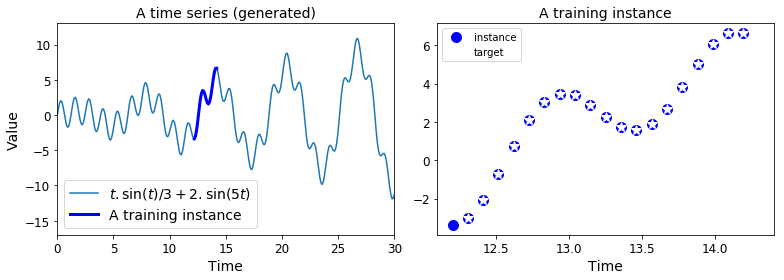

In [44]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")


save_fig("time_series_plot")
plt.show()


In [45]:
X_batch, y_batch = next_batch(1, n_steps)

In [46]:
print(X_batch)

[[[-4.50341339]
  [-4.14236382]
  [-3.92870702]
  [-4.0488651 ]
  [-4.59566362]
  [-5.54426493]
  [-6.75703201]
  [-8.0161452 ]
  [-9.07599852]
  [-9.72255772]
  [-9.82515641]
  [-9.36805638]
  [-8.45405093]
  [-7.27923294]
  [-6.08510771]
  [-5.09977511]
  [-4.48258027]
  [-4.28578062]
  [-4.44260919]
  [-4.78464929]]]


In [47]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [48]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [49]:
# for every cell, add a full-connected layer to output, without affecting
# the weights for the cell itself
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [50]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [51]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [52]:
saver = tf.train.Saver()

In [53]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        # y_batch is a series one day ahead of X_batch
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_time_series_model") # not shown in the book

0 	MSE: 11.234554
100 	MSE: 0.38021222
200 	MSE: 0.12111042
300 	MSE: 0.064446695
400 	MSE: 0.05852244
500 	MSE: 0.05630867
600 	MSE: 0.050434463
700 	MSE: 0.045523368
800 	MSE: 0.048774377
900 	MSE: 0.04667491
1000 	MSE: 0.04696534
1100 	MSE: 0.045852553
1200 	MSE: 0.039650373
1300 	MSE: 0.047102667
1400 	MSE: 0.040489137


In [54]:
with tf.Session() as sess:                          # not shown in the book
    saver.restore(sess, "./my_time_series_model")   # not shown

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [55]:
y_pred

array([[[-3.3839061 ],
        [-2.44384   ],
        [-1.159047  ],
        [ 0.70688784],
        [ 2.177589  ],
        [ 3.0767996 ],
        [ 3.4366379 ],
        [ 3.3269014 ],
        [ 2.833223  ],
        [ 2.1952014 ],
        [ 1.6940963 ],
        [ 1.5705847 ],
        [ 1.9272693 ],
        [ 2.718801  ],
        [ 3.8731227 ],
        [ 5.089126  ],
        [ 6.1004977 ],
        [ 6.642303  ],
        [ 6.62379   ],
        [ 6.0604224 ]]], dtype=float32)

Saving figure time_series_pred_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/rnn/time_series_pred_plot.png'

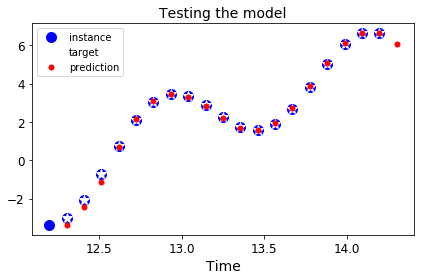

In [56]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

save_fig("time_series_pred_plot")
plt.show()

In [57]:
# Deep RNNs
reset_graph()

n_steps = 28
n_inputs = 28
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

In [58]:
n_neurons = 100
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [59]:
states_concat = tf.concat(axis=1, values=states)
logits = tf.layers.dense(states_concat, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [60]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.94666666 Test accuracy: 0.939
1 Train accuracy: 0.97333336 Test accuracy: 0.9546
2 Train accuracy: 0.94666666 Test accuracy: 0.9652
3 Train accuracy: 0.9866667 Test accuracy: 0.9731
4 Train accuracy: 0.99333334 Test accuracy: 0.9736
5 Train accuracy: 0.9866667 Test accuracy: 0.974
6 Train accuracy: 0.98 Test accuracy: 0.9744
7 Train accuracy: 0.99333334 Test accuracy: 0.9765
8 Train accuracy: 1.0 Test accuracy: 0.9805
9 Train accuracy: 0.99333334 Test accuracy: 0.9796


In [61]:
# Dropout
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [62]:
keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]

# Use a dropout wrapper to apply dropout between RNN layers
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [63]:
learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [64]:
# Unfortunately, this code is only usable for training, 
# because the DropoutWrapper class has no training parameter, 
# so it always applies dropout, even when the model is not being trained, 
# so we must first train the model,
# then create a different model for testing, without the DropoutWrapper.
n_iterations = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            print(iteration, "Training MSE:", mse)
    
    saver.save(sess, "./my_dropout_time_series_model")

0 Training MSE: 16.247728
100 Training MSE: 5.612622
200 Training MSE: 3.3477523
300 Training MSE: 3.1177201
400 Training MSE: 3.181814
500 Training MSE: 2.7621899
600 Training MSE: 3.2924027
700 Training MSE: 3.1477497
800 Training MSE: 2.8947096
900 Training MSE: 3.6138883


In [65]:
reset_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


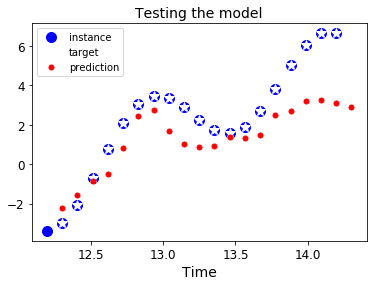

In [66]:
# Restore the saved model and
# use the newly build no-dropout model for testing
with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()


In [67]:
# Another option is to write a commandline script
reset_graph()

import sys
training = True  # in a script, this would be (sys.argv[-1] == "train") instead

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
if training:
    cells = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
             for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])    # not shown in the book
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs) # not shown
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])   # not shown
loss = tf.reduce_mean(tf.square(outputs - y))                     # not shown
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)   # not shown
training_op = optimizer.minimize(loss)                            # not shown
init = tf.global_variables_initializer()                          # not shown
saver = tf.train.Saver()                                          # not shown

with tf.Session() as sess:
    if training:
        init.run()
        for iteration in range(n_iterations):
            X_batch, y_batch = next_batch(batch_size, n_steps)    # not shown
            _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch}) # not shown
            if iteration % 100 == 0:                              # not shown
                print(iteration, "Training MSE:", mse)            # not shown
        save_path = saver.save(sess, "/tmp/my_model.ckpt")
    else:
        saver.restore(sess, "/tmp/my_model.ckpt")
        X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs))) # not shown
        y_pred = sess.run(outputs, feed_dict={X: X_new})                              # not shown


0 Training MSE: 16.325304
100 Training MSE: 5.545552
200 Training MSE: 5.0666018
300 Training MSE: 3.7373066
400 Training MSE: 2.7933764
500 Training MSE: 2.9360437
600 Training MSE: 3.4870102
700 Training MSE: 2.9879267
800 Training MSE: 3.354269
900 Training MSE: 4.5143228
